# Week 5

# Getting Started with Pandas (Part 2)
# Data Analysis with Data Frames

In this week, we will look into a data set about movies and use data frames to perform data analysis.

In [1]:
import pandas as pd

## 1. Download and extract MovieLens data

- [MovieLens](https://grouplens.org/datasets/movielens/) is a web-based recommender system and virtual community that recommends movies for its users to watch, based on their file preferences using collaborative filtering of members' movie ratings and movie reviews. 
- We will look at its `ml-latest-small` dataset.

In [1]:
# Download ml-latest-small.zip from https://grouplens.org/datasets/movielens/
import os 
import urllib.request
url = "http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
file_path = "Data/"
zip_file = "ml-latest-small.zip"

# Create the Data folder if it doesn't already exist.
if not os.path.isfile(file_path):
    os.mkdir(file_path)

# Download file
urllib.request.urlretrieve(url, file_path + zip_file)

('Data/ml-latest-small.zip', <http.client.HTTPMessage at 0x197788c4250>)

In [2]:
# Decompress the zip file
import zipfile
f = zipfile.ZipFile(file_path + zip_file, "r")
f.printdir()
f.extractall(file_path)
f.close()

File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431


In [3]:
# Check that files has been unzipped
print(os.listdir(file_path + "ml-latest-small"))

['links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']


In [4]:
# Delete the zip file
os.remove(file_path + zip_file)
os.listdir(file_path)

['ml-latest-small']

In [10]:
# Write a function to download and decompress file
import os
import urllib.request
import zipfile

def get_movielens(file_path, file_name, delete_zip_file=False):
    url = "http://files.grouplens.org/datasets/movielens/" + file_name
    if not os.path.exists(file_path + file_name):
        urllib.request.urlretrieve(url, file_path + file_name)
        print("File", file_name, "downloaded.")
    with zipfile.ZipFile(file_path + file_name, "r") as f:
        f.extractall(file_path)
        print("Files extracted:")
        print(f.printdir())
    if delete_zip_file:
        os.remove(file_path + file_name)

In [11]:
get_movielens(file_path, zip_file)

File ml-latest-small.zip downloaded.
Files extracted:
File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431
None


## 2. Load ratings data as a pandas DataFrame
- Load csv file as a DataFrame
- head()
- shape, columns, dtypes
- indexing with loc[]
- Handle date and time data
- Data transformation with apply()

In [4]:
import pandas as pd
ratings_df = pd.read_csv("Data/ml-latest-small/ratings.csv",
                         sep=",")
ratings_df.head()  # Show the first several rows of the dataset

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [8]:
# Display the shape of data

print(ratings_df.shape)

(100836, 4)


In [9]:
# Display the types of each feature
print(ratings_df.dtypes)

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [8]:
# Convert time stamp to a readable format
from datetime import datetime

# Example: convert the first time stamp
timestamp = ratings_df.loc[0, "timestamp"]
print(timestamp)

dt = datetime.fromtimestamp(timestamp)
print(dt)

ratings_df.loc[0, "Year"] = dt.year
ratings_df.loc[0, "Month"] = dt.month
ratings_df.loc[0, "Day"] = dt.day
ratings_df.loc[0, "Hour"] = dt.hour
ratings_df.loc[0, "Minute"] = dt.minute
ratings_df.loc[0, "Second"] = dt.second
ratings_df.head()

964982703
2000-07-30 14:45:03


userId  movieId  rating  timestamp    Year  Month   Day  Hour  Minute  \
0       1        1     4.0  964982703  2000.0    7.0  30.0  14.0    45.0   
1       1        3     4.0  964981247     NaN    NaN   NaN   NaN     NaN   
2       1        6     4.0  964982224     NaN    NaN   NaN   NaN     NaN   
3       1       47     5.0  964983815     NaN    NaN   NaN   NaN     NaN   
4       1       50     5.0  964982931     NaN    NaN   NaN   NaN     NaN   

   Second  
0     3.0  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [9]:
# Use apply() to apply a function to all rows
ratings_df["DT"] = ratings_df["timestamp"].apply(datetime.fromtimestamp)
ratings_df.head()

userId  movieId  rating  timestamp    Year  Month   Day  Hour  Minute  \
0       1        1     4.0  964982703  2000.0    7.0  30.0  14.0    45.0   
1       1        3     4.0  964981247     NaN    NaN   NaN   NaN     NaN   
2       1        6     4.0  964982224     NaN    NaN   NaN   NaN     NaN   
3       1       47     5.0  964983815     NaN    NaN   NaN   NaN     NaN   
4       1       50     5.0  964982931     NaN    NaN   NaN   NaN     NaN   

   Second                  DT  
0     3.0 2000-07-30 14:45:03  
1     NaN 2000-07-30 14:20:47  
2     NaN 2000-07-30 14:37:04  
3     NaN 2000-07-30 15:03:35  
4     NaN 2000-07-30 14:48:51

We can also create functions to fill column year, month, ...

In [10]:
# Ex: Fill the year column
ratings_df["Year"] = ratings_df["DT"].dt.year
#ratings dtypes
ratings_df.head()

userId  movieId  rating  timestamp  Year  Month   Day  Hour  Minute  \
0       1        1     4.0  964982703  2000    7.0  30.0  14.0    45.0   
1       1        3     4.0  964981247  2000    NaN   NaN   NaN     NaN   
2       1        6     4.0  964982224  2000    NaN   NaN   NaN     NaN   
3       1       47     5.0  964983815  2000    NaN   NaN   NaN     NaN   
4       1       50     5.0  964982931  2000    NaN   NaN   NaN     NaN   

   Second                  DT  
0     3.0 2000-07-30 14:45:03  
1     NaN 2000-07-30 14:20:47  
2     NaN 2000-07-30 14:37:04  
3     NaN 2000-07-30 15:03:35  
4     NaN 2000-07-30 14:48:51

In [ ]:
def get_year(x):
    return x.get_year

In [48]:
ratings_df["Year"] = ratings_df["DT"].apply(get_year)
print(ratings_df["year"])

0         2000
1         2000
2         2000
3         2000
4         2000
          ... 
100831    2017
100832    2017
100833    2017
100834    2017
100835    2017
Name: year, Length: 100836, dtype: int64


## 3. Save the processed ratings data

Data can be saved in many different formats. Today we will save the processed rating data as a new CSV file.

In [11]:
# Save the processed data as a .csv file
csv_file = "Data/ml-latest-small/ratings_processed.csv"
ratings_df.to_csv(csv_file)

In [14]:
# Ex: Load the new file and display its first 5 rows.
ratings_df = pd.read_csv("Data/ml-latest-small/ratings_processed.csv", sep = ',', index_col=0)
ratings_df.head()

userId  movieId  rating  timestamp  Year  Month   Day  Hour  Minute  \
0       1        1     4.0  964982703  2000    7.0  30.0  14.0    45.0   
1       1        3     4.0  964981247  2000    NaN   NaN   NaN     NaN   
2       1        6     4.0  964982224  2000    NaN   NaN   NaN     NaN   
3       1       47     5.0  964983815  2000    NaN   NaN   NaN     NaN   
4       1       50     5.0  964982931  2000    NaN   NaN   NaN     NaN   

   Second                   DT  
0     3.0  2000-07-30 14:45:03  
1     NaN  2000-07-30 14:20:47  
2     NaN  2000-07-30 14:37:04  
3     NaN  2000-07-30 15:03:35  
4     NaN  2000-07-30 14:48:51

## 4. Analyzing MovieLens Data
- Distribution of movie ratings
- Popular movies

In [21]:
# Use value_counts() to find the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts()
print(rating_frequencies)

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


In [15]:
# Find sorted the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts().sort_index(ascending=False)
print(rating_frequencies)

5.0    13211
4.5     8551
4.0    26818
3.5    13136
3.0    20047
2.5     5550
2.0     7551
1.5     1791
1.0     2811
0.5     1370
Name: rating, dtype: int64


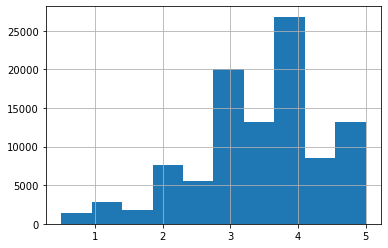

In [25]:
# Visualize rating frequencies
ratings_df['rating'].hist()

In [18]:
# Which years were these ratings created?
print('Earliest year of ratings:', ratings_df['Year'].min())
print('Latest year of ratings:', ratings_df['Year'].max())
print('The years of ratings:',set(ratings_df['Year']))

Earliest year of ratings: 1996
Latest year of ratings: 2018
The years of ratings: {1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018}


In [20]:
# How are rating frequencies distributed in 2018?
filter_2018 = (ratings_df['Year']==2018)
ratings_2018 = ratings_df[filter_2018]
ratings_2018.head()

userId  movieId  rating   timestamp  Year  Month  Day  Hour  Minute  \
1839      18      913     4.0  1517525849  2018    NaN  NaN   NaN     NaN   
1852      18     1193     4.5  1517686025  2018    NaN  NaN   NaN     NaN   
1980      18     5120     4.5  1516054115  2018    NaN  NaN   NaN     NaN   
2012      18     6787     4.0  1534020896  2018    NaN  NaN   NaN     NaN   
2053      18    27878     4.5  1526159893  2018    NaN  NaN   NaN     NaN   

      Second                   DT  
1839     NaN  2018-02-01 17:57:29  
1852     NaN  2018-02-03 14:27:05  
1980     NaN  2018-01-15 17:08:35  
2012     NaN  2018-08-11 16:54:56  
2053     NaN  2018-05-12 17:18:13

In [21]:
# How are rating frequencies distributed in 2003?
filter_2003 = (ratings_df['Year']==2003)
ratings_2003 = ratings_df[filter_2003]
ratings_2003.head()

userId  movieId  rating   timestamp  Year  Month  Day  Hour  Minute  \
1073       9       41     3.0  1044656650  2003    NaN  NaN   NaN     NaN   
1074       9      187     3.0  1044657119  2003    NaN  NaN   NaN     NaN   
1075       9      223     4.0  1044656650  2003    NaN  NaN   NaN     NaN   
1076       9      371     3.0  1044656716  2003    NaN  NaN   NaN     NaN   
1077       9      627     3.0  1044657102  2003    NaN  NaN   NaN     NaN   

      Second                   DT  
1073     NaN  2003-02-07 17:24:10  
1074     NaN  2003-02-07 17:31:59  
1075     NaN  2003-02-07 17:24:10  
1076     NaN  2003-02-07 17:25:16  
1077     NaN  2003-02-07 17:31:42

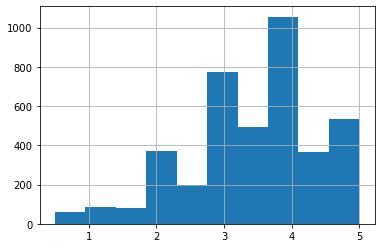

In [23]:
ratings_2003['rating'].hist()

Next, let's identify some popular movies.

In [26]:
# Which movie received the highest number of ratings?
ratings_df['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

In [29]:
# What is the name of the movie? (The answer requires another data file.)
movie_df = pd.read_csv("Data/ml-latest-small/movies.csv", sep = ',')
movie_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [32]:
# Find out the title corresponding to the movies with high number of ratings.

ids = [356, 318, 296]
# movies_df[movies_df['movieId'] == 356]
movie_df[movie_df['movieId'].isin(ids)]

movieId                             title                       genres
257      296               Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller
277      318  Shawshank Redemption, The (1994)                  Crime|Drama
314      356               Forrest Gump (1994)     Comedy|Drama|Romance|War

In [30]:
# Which movie receives the largest amount of 5.0?



In [28]:
# Find the name of this movie



In [29]:
# Which movie has the highest average rating?



In [30]:
# Find the top ten highest-rated movies.

